In [1]:
from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style="whitegrid")

### Boxplot non-hue

#### Multiple comparisons

By default, no multiple comparisons correction is applied.

In [2]:
df = sns.load_dataset("tips")

variables={'x': 'day', 'y': 'total_bill', 'hue': None}
self.tuple_group_names=[('Sun',), ('Thur',), ('Fri',), ('Sat',)]
self.plotter.group_names=Index(['Sun', 'Thur', 'Fri', 'Sat'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


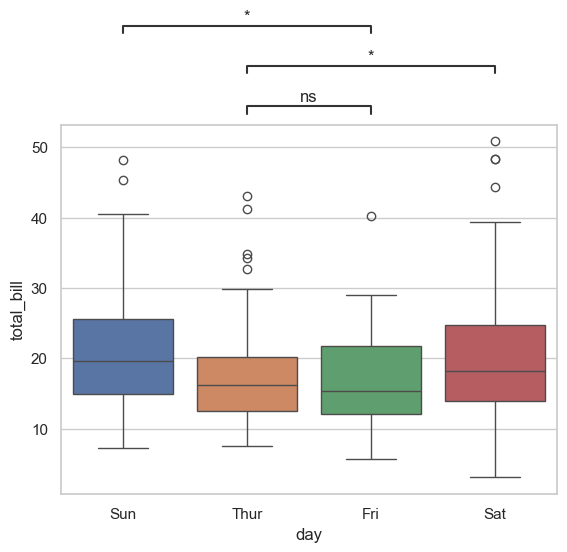

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, hue=x, order=order, hue_order=order)
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

#### Statistical test results

The `annotate` method returns the tuple `ax, annotations`, where `annotations` is a list of `Annotation` objects.
The `data` attribute of an Annotation is a `StatResult` object, which containing both the original data of the groups
(boxes for boxplots), and the statistical test results (p-value, etc).

In [7]:
for res in test_results:
    print(res.data)

print("\nStatResult attributes:", test_results[0].data.__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pvalue', '_corrected_significance', '_correction_method', 'alpha', 'group1', 'group2'])


#### Applying a multiple comparisons correction (requires `statsmodels`)
In this example, note that previously configured parameters are remembered if not changed.
This is the case for `pairs`, `test`, `text_format`, and `loc`.

To avoid this, you can call `annot.reset_configuration()` to get back to all default/unset values.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02


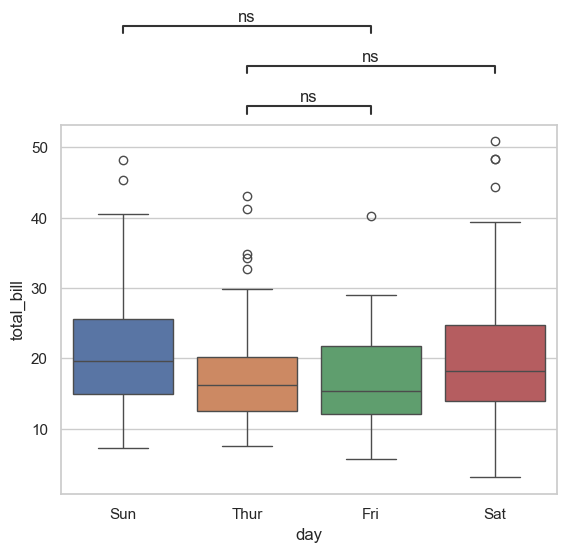

In [8]:
plotting = {
    "data": df,
    "x": x,
    "y": y,
    "hue": x,
    "hue_order": order,
    "order": order
}
ax = sns.boxplot(**plotting)
annot.new_plot(ax, **plotting)
annot.configure(comparisons_correction="Bonferroni", verbose=2)
test_results = annot.apply_test().annotate()

Or another

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.690e-02 (ns) U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.680e-02 (ns) U_stat=9.605e+02


(<Axes: xlabel='day', ylabel='total_bill'>,
  <statannotations.Annotation.Annotation at 0x72af4d75c4d0>])

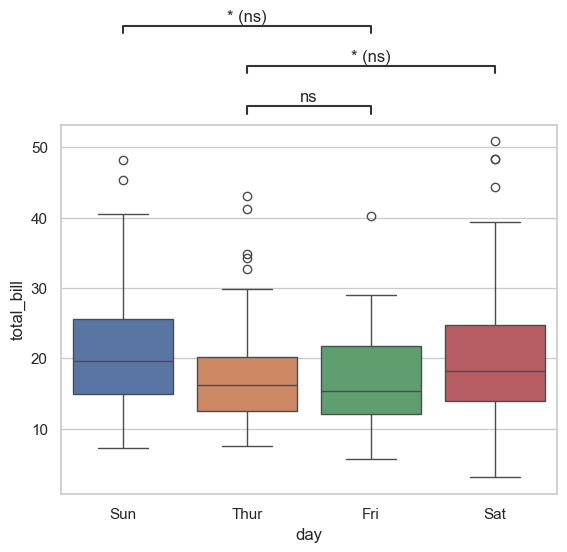

In [9]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.new_plot(ax, data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.configure(comparisons_correction="BH")
annot.apply_and_annotate()

To have `"ns"` instead of `"* (ns)"`, configure with `correction_format="replace"`.

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.477e-01 U_stat=6.305e+02
Thur vs. Sat: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.690e-02 (ns) U_stat=2.180e+03
Sun vs. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.680e-02 (ns) U_stat=9.605e+02


(<Axes: xlabel='day', ylabel='total_bill'>,
  <statannotations.Annotation.Annotation at 0x72af4caf51f0>])

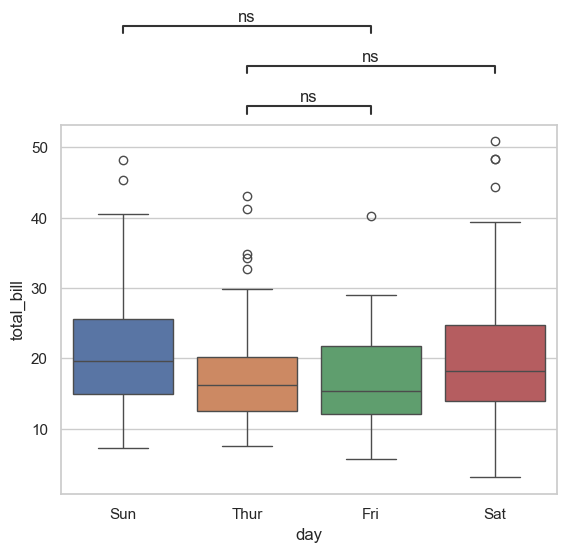

In [10]:
ax = sns.boxplot(data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.new_plot(ax, data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.configure(comparisons_correction="BH", correction_format="replace")
annot.apply_and_annotate()

#### Location

Statistical test annotation can be either drawn inside the plot area (`loc='inside'`), or on top on it (`loc='outside'`).

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sun vs. Thur: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01
Sun vs. Fri: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-03
Sun vs. Sat: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01


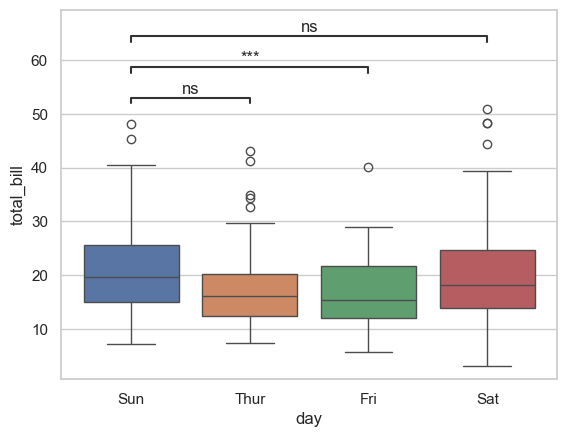

In [12]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
pairs = [("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")]
ax = sns.boxplot(data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.new_plot(ax, pairs=pairs, data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.configure(test=None, loc='inside')
annot.set_pvalues([0.1, 0.1, 0.001])
annot.annotate()
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

We create boxes with unequal ymax position.

In [4]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


variables={'x': 'color', 'y': 'price', 'hue': 'cut'}
self.tuple_group_names=[('E', 'Ideal'), ('E', 'Premium'), ('E', 'Good'), ('E', 'Very Good'), ('E', 'Fair'), ('I', 'Ideal'), ('I', 'Premium'), ('I', 'Good'), ('I', 'Very Good'), ('I', 'Fair'), ('J', 'Ideal'), ('J', 'Premium'), ('J', 'Good'), ('J', 'Very Good'), ('J', 'Fair')]
self.plotter.group_names=Index(['E', 'I', 'J'], dtype='object', name='x')
self.plotter.hue_names=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

E_Ideal vs. E_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:1.560e-31 U_stat=3.756e+06
I_Ideal vs. I_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:5.141e-61 U_stat=1.009e+06
J_Ideal vs. J_Premium: Mann-Whitney-Wilcoxon test two-sided, P_val:4.018e-37 U_stat=2.337e+05
E_Ideal vs. E_Good: Mann-Whitney-Wilcoxon test two

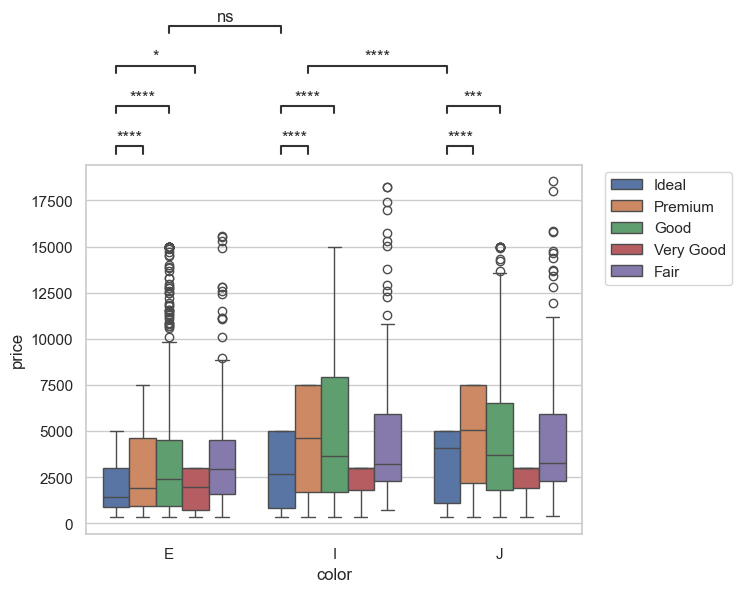

In [5]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
order = ["E", "I", "J"]
pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.new_plot(ax, pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [6]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [7]:
# In this case we just have to pass the list of categories objects to the annotate function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

variables={'x': 'day', 'y': 'total_bill', 'hue': 'tip_bucket'}
self.tuple_group_names=[('Thur', Interval(0.991, 4.0, closed='right')), ('Thur', Interval(4.0, 7.0, closed='right')), ('Thur', Interval(7.0, 10.0, closed='right')), ('Fri', Interval(0.991, 4.0, closed='right')), ('Fri', Interval(4.0, 7.0, closed='right')), ('Fri', Interval(7.0, 10.0, closed='right')), ('Sat', Interval(0.991, 4.0, closed='right')), ('Sat', Interval(4.0, 7.0, closed='right')), ('Sat', Interval(7.0, 10.0, closed='right')), ('Sun', Interval(0.991, 4.0, closed='right')), ('Sun', Interval(4.0, 7.0, closed='right')), ('Sun', Interval(7.0, 10.0, closed='right'))]
self.plotter.group_names=Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object', name='x')
self.plotter.hue_names=[Interval(0.991, 4.0, closed='right'), Interval(4.0, 7.0, closed='right'), Interval(7.0, 10.0, closed='right')]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
   

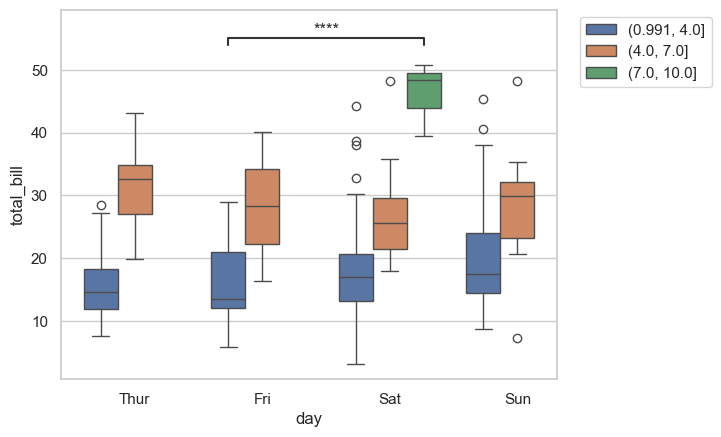

In [8]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
# method calls can be queued
(annot
 .reset_configuration()
 .new_plot(ax, [(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
           data=df, x=x, y=y, hue=hue)
 .configure(test='t-test_ind')
 .apply_test()
 .annotate())

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Barplot with hue

Note: Support for barplot has not been fully implemented yet.

variables={'x': 'clarity', 'y': 'carat', 'hue': 'color'}
self.tuple_group_names=[('IF', 'E'), ('IF', 'I'), ('IF', 'J'), ('VVS1', 'E'), ('VVS1', 'I'), ('VVS1', 'J'), ('VVS2', 'E'), ('VVS2', 'I'), ('VVS2', 'J'), ('VS1', 'E'), ('VS1', 'I'), ('VS1', 'J'), ('VS2', 'E'), ('VS2', 'I'), ('VS2', 'J'), ('SI1', 'E'), ('SI1', 'I'), ('SI1', 'J'), ('SI2', 'E'), ('SI2', 'I'), ('SI2', 'J'), ('I1', 'E'), ('I1', 'I'), ('I1', 'J')]
self.plotter.group_names=Index(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], dtype='object', name='x')
self.plotter.hue_names=['E', 'I', 'J']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SI2_I vs. SI2_J: t-test independent samples, P_val:3.710e-01 t=-8.949e-01
SI1_I vs. SI1_J: t-test independent samples, P_val:8.513e-05 t=-3.937e+00
VS1_I vs. VS1_J: t-test independent samples, P_val:9.140e-05 t=-3.923e+00
VS2_I vs. VS2_J

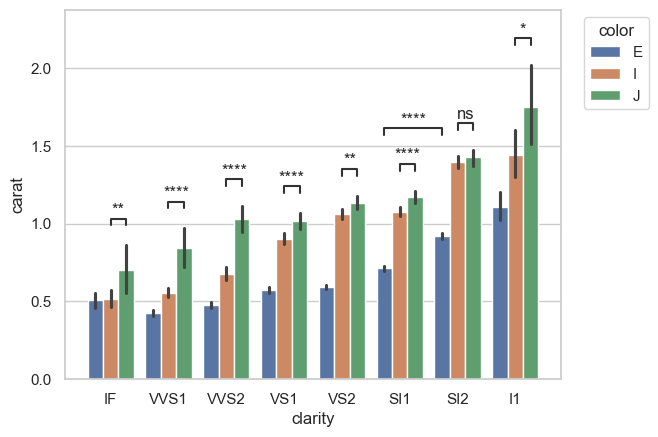

In [9]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda c: c in 'EIJ')]

x = "clarity"
y = "carat"
hue = "color"
hue_order=["E", "I", "J"]
pairs = [
    (("SI2", "E"), ("SI1", "E"))
    ]
pairs = pairs + [((clar, 'I'), (clar, 'J'))
                         for clar in df['clarity'].unique()]
width = 0.4
ax = sns.barplot(data=df, x=x, y=y, hue=hue, hue_order=hue_order, seed=2021)
annot.new_plot(ax, pairs, plot='barplot',
               data=df, x=x, y=y, hue=hue, hue_order=hue_order, seed=2021)
annot.apply_test().annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)
plt.savefig('example_barplot_hue.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

![](./example_tuning_y_offsets_w_arguments.png)

variables={'x': 'day', 'y': 'total_bill', 'hue': 'smoker'}
self.tuple_group_names=[('Thur', 'Yes'), ('Thur', 'No'), ('Fri', 'Yes'), ('Fri', 'No'), ('Sat', 'Yes'), ('Sat', 'No'), ('Sun', 'Yes'), ('Sun', 'No')]
self.plotter.group_names=Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object', name='x')
self.plotter.hue_names=['Yes', 'No']
Sat_Yes vs. Sat_No: t-test independent samples, P_val:4.304e-01 t=7.922e-01
Thur_No vs. Fri_No: t-test independent samples, P_val:7.425e-01 t=-3.305e-01
Thur_Yes vs. Sun_No: t-test independent samples, P_val:5.623e-01 t=-5.822e-01


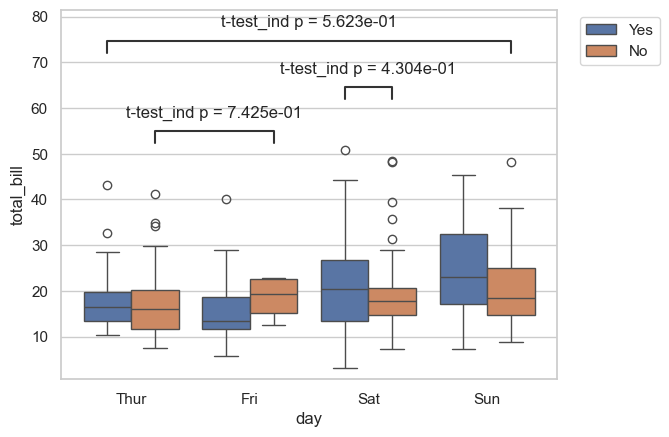

In [10]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
pairs = [(("Thur", "No"), ("Fri", "No")),
         (("Sat", "Yes"), ("Sat", "No")),
         (("Sun", "No"), ("Thur", "Yes"))]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
annot.new_plot(ax, pairs,
               data=df, x=x, y=y, hue=hue)
annot.configure(test='t-test_ind', text_format='full', loc='inside',
                comparisons_correction=None, line_height=0.05, text_offset=8)

annot.apply_test().annotate(line_offset_to_group=0.2, line_offset=0.1)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Use a different test with StatTest

variables={'x': 'species', 'y': 'sepal_length', 'hue': None}
self.tuple_group_names=[('setosa',), ('versicolor',), ('virginica',)]
self.plotter.group_names=Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Bartlett statistical test for equal variances, P_val:8.660e-03 Stat=6.892e+00
versicolor vs. virginica: Bartlett statistical test for equal variances, P_val:1.478e-01 Stat=2.095e+00
setosa vs. virginica: Bartlett statistical test for equal variances, P_val:6.379e-05 Stat=1.599e+01


(<Axes: xlabel='species', ylabel='sepal_length'>,
  <statannotations.Annotation.Annotation at 0x7d401102f860>])

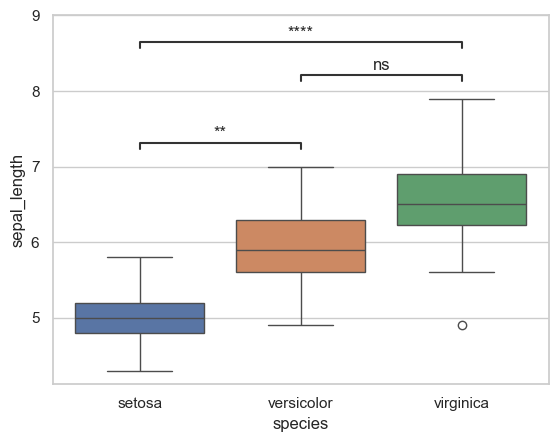

In [12]:
from statannotations.stats.StatTest import StatTest

# For example bartlett's test
from scipy.stats import bartlett

df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

# Required descriptors for annotate
custom_long_name = 'Bartlett statistical test for equal variances'
custom_short_name = 'Bartlett'
custom_func = bartlett
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

# Then, same as usual
ax = sns.boxplot(data=df, x=x, y=y, hue=x)
annot.reset_configuration()
annot.new_plot(ax, pairs, data=df, x=x, y=y, hue=x)
annot.configure(test=custom_test, comparisons_correction=None,
                text_format='star').apply_test().annotate()

### Use a custom test with StatTest

variables={'x': 'species', 'y': 'sepal_length', 'hue': None}
self.tuple_group_names=[('setosa',), ('versicolor',), ('virginica',)]
self.plotter.group_names=Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Log t-test, P_val:4.416e-18 Stat=-1.066e+01
versicolor vs. virginica: Log t-test, P_val:1.979e-07 Stat=-5.598e+00
setosa vs. virginica: Log t-test, P_val:3.486e-29 Stat=-1.605e+01


(<Axes: xlabel='species', ylabel='sepal_length'>,
  <statannotations.Annotation.Annotation at 0x7d40131fdf40>])

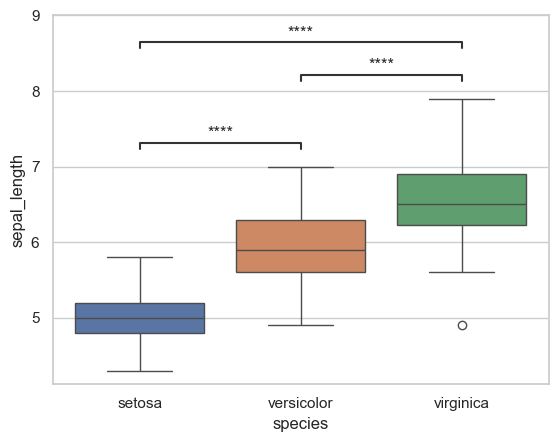

In [13]:
from statannotations.stats.StatTest import StatTest
import numpy as np
from scipy.stats import ttest_ind

# Any function that follows the StatTest API could go here
def log_ttest(group_data1, group_data2, **stats_params):
    group_data1_log = np.log(group_data1)
    group_data2_log = np.log(group_data2)

    return ttest_ind(group_data1_log, group_data2_log, **stats_params)

df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

# Required descriptors for annotate
custom_long_name = 'Log t-test'
custom_short_name = 'log-t'
custom_func = log_ttest
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

# Then, same as usual
ax = sns.boxplot(data=df, x=x, y=y, hue=x)
annot = Annotator(ax, pairs, data=df, x=x, y=y, hue=x)
annot.configure(test=custom_test, comparisons_correction=None,
                text_format='star').apply_test().annotate()

### Custom p-values as input
! multiple comparisons corrections will be applied if they are configured in annotator.

In [14]:
from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [np.float64(0.008659557933880048), np.float64(6.378941946712554e-05), np.float64(0.14778816016231236)]


variables={'x': 'species', 'y': 'sepal_length', 'hue': None}
self.tuple_group_names=[('setosa',), ('versicolor',), ('virginica',)]
self.plotter.group_names=Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Custom statistical test, P_val:8.660e-03
versicolor vs. virginica: Custom statistical test, P_val:1.478e-01
setosa vs. virginica: Custom statistical test, P_val:6.379e-05


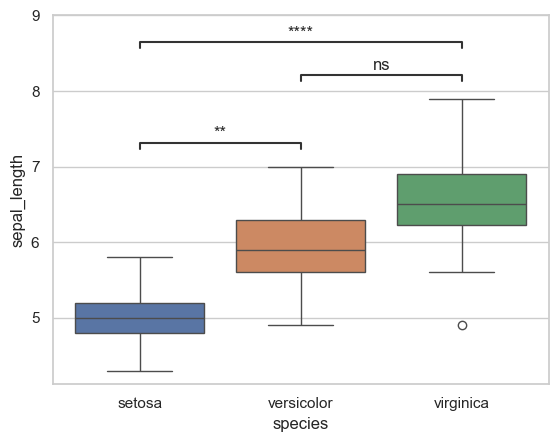

In [15]:
ax = sns.boxplot(data=df, x=x, y=y, hue=x)
annot.new_plot(ax=ax, pairs=pairs,
               data=df, x=x, y=y, hue=x)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=pvalues)
 .annotate())
plt.show()

Non-hue violin

variables={'x': 'species', 'y': 'sepal_length', 'hue': None}
self.tuple_group_names=[('setosa',), ('versicolor',), ('virginica',)]
self.plotter.group_names=Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa vs. versicolor: Custom statistical test, P_val:8.660e-03
versicolor vs. virginica: Custom statistical test, P_val:1.478e-01
setosa vs. virginica: Custom statistical test, P_val:6.379e-05


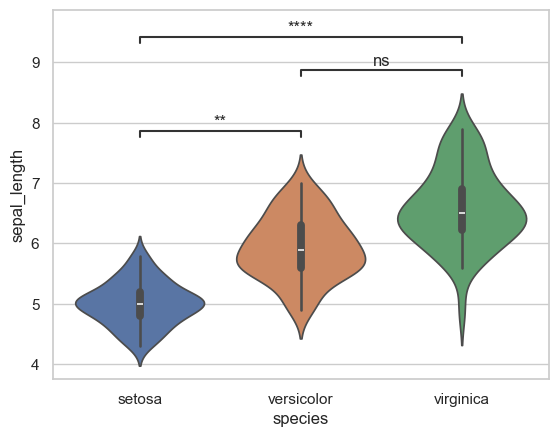

In [16]:
ax = sns.violinplot(data=df, x=x, y=y, hue=x)
annot.new_plot(ax=ax, pairs=pairs, plot="violinplot",
               data=df, x=x, y=y, hue=x)
(annot
 .configure(test=None, test_short_name=test_short_name)
 .set_pvalues(pvalues=pvalues)
 .annotate())
plt.show()

### Custom annotation texts

variables={'x': 'day', 'y': 'total_bill', 'hue': None}
self.tuple_group_names=[('Sun',), ('Thur',), ('Fri',), ('Sat',)]
self.plotter.group_names=Index(['Sun', 'Thur', 'Fri', 'Sat'], dtype='object', name='x')
self.plotter.hue_names=[]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: first pair
Thur vs. Sat: second pair
Sun vs. Fri: third pair


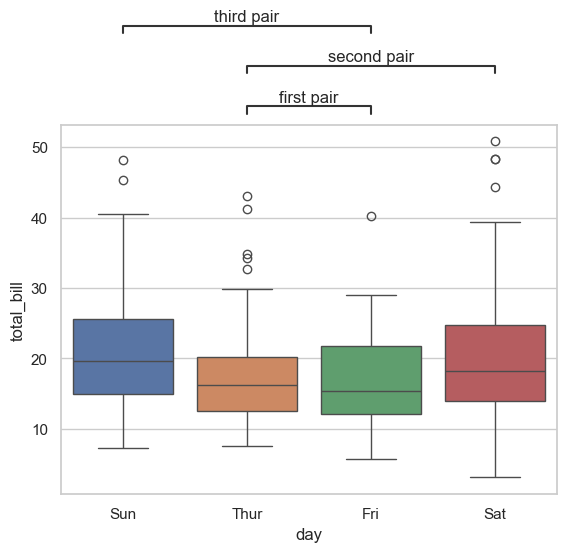

In [18]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.new_plot(ax, pairs=[("Thur", "Fri"),("Thur", "Sat"), ("Fri", "Sun")],
               data=df, x=x, y=y, hue=x, hue_order=order, order=order)
annot.configure(loc='outside')
annot.set_custom_annotations(["first pair", "second pair", "third pair"])
annot.annotate()

plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')

With a log-scale swarm plot


variables={'x': 'subtype', 'y': 'mutation_rate_samp', 'hue': 'Synon_Nonsynon'}
self.tuple_group_names=[('H3N2', 'Nonsynonymous'), ('H3N2', 'Synonymous'), ('H1N1', 'Nonsynonymous'), ('H1N1', 'Synonymous'), ('Influenza B', 'Nonsynonymous'), ('Influenza B', 'Synonymous')]
self.plotter.group_names=Index(['H3N2', 'H1N1', 'Influenza B'], dtype='object', name='x')
self.plotter.hue_names=['Nonsynonymous', 'Synonymous']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

H1N1_Nonsynonymous vs. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous vs. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous vs. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


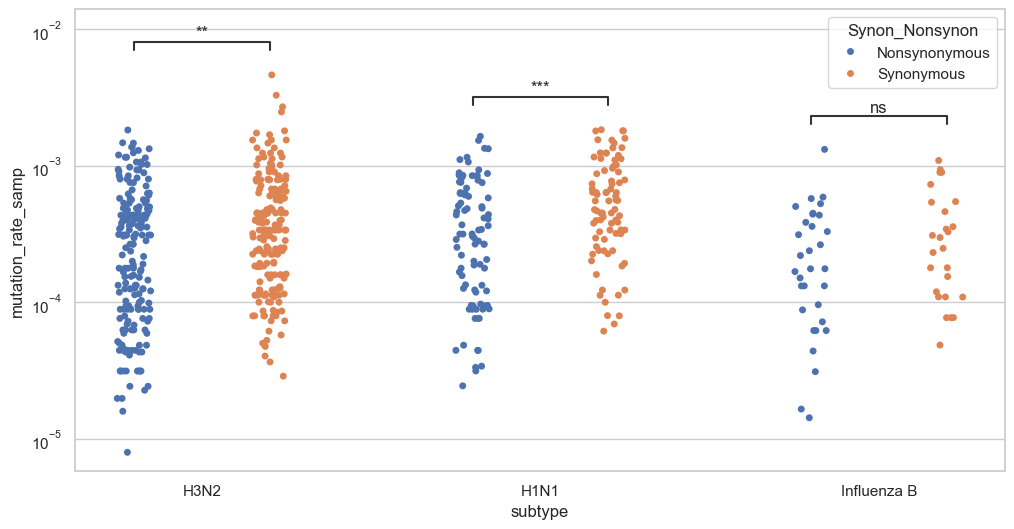

In [19]:
samples = pd.read_csv('samples.tsv', sep = '\t')
samples = samples.loc[samples.mutation_rate_samp < 1]
samples = samples.drop(columns=['mutation_rate_samp'])
samples = (
    samples.melt(id_vars=['sampleID', 'subtype'],
                 value_vars=['nonsynon_mutation_rate_samp','synon_mutation_rate_samp'],
                 var_name='Synon_Nonsynon', value_name='mutation_rate_samp')
    .replace('nonsynon_mutation_rate_samp', 'Nonsynonymous')
    .replace('synon_mutation_rate_samp', 'Synonymous'))

samples = samples.loc[samples.mutation_rate_samp > 0]

significanceComparisons = [(('H3N2','Synonymous'), ('H3N2','Nonsynonymous')),
                           (('H1N1','Synonymous'), ('H1N1','Nonsynonymous')),
                           (('Influenza B','Synonymous'), ('Influenza B','Nonsynonymous'))]

fig_args = {'x': 'subtype',
            'y': 'mutation_rate_samp',
            'hue':'Synon_Nonsynon',
            'data': samples,
            'order': ['H3N2', 'H1N1', 'Influenza B'],
            'hue_order':['Nonsynonymous','Synonymous'],
            'dodge': True}

configuration = {'test':'Mann-Whitney',
                 'comparisons_correction':None,
                 'text_format':'star'}

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_yscale('log')

sns.stripplot(ax=ax, **fig_args)
annotator = Annotator(ax=ax, pairs=significanceComparisons,
                      **fig_args, plot='stripplot')
annotator.configure(**configuration).apply_test().annotate()
fig.savefig(f'flu_dataset_log_scale_in_axes_strip.svg', format='svg')

With a horizontal orientation

variables={'x': 'mutation_rate_samp', 'y': 'subtype', 'hue': 'Synon_Nonsynon'}
self.tuple_group_names=[('H3N2', 'Nonsynonymous'), ('H3N2', 'Synonymous'), ('H1N1', 'Nonsynonymous'), ('H1N1', 'Synonymous'), ('Influenza B', 'Nonsynonymous'), ('Influenza B', 'Synonymous')]
self.plotter.group_names=Index(['H3N2', 'H1N1', 'Influenza B'], dtype='object', name='y')
self.plotter.hue_names=['Nonsynonymous', 'Synonymous']
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

H1N1_Nonsynonymous vs. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous vs. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous vs. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


(<Axes: xlabel='mutation_rate_samp', ylabel='subtype'>,
  <statannotations.Annotation.Annotation at 0x7d4009ebb080>])

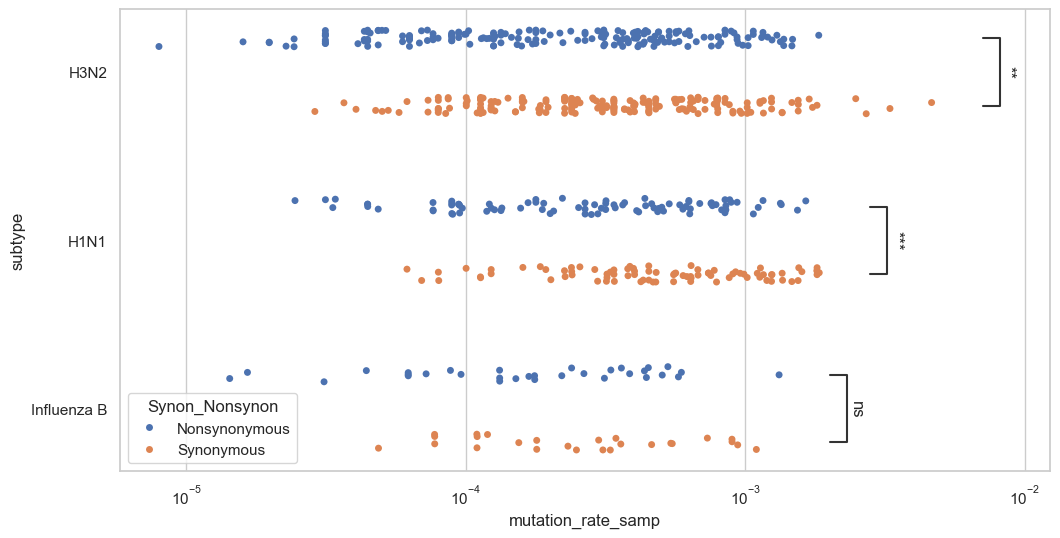

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
fig_args_horiz = {
    **fig_args,
    'y': 'subtype',
    'x': 'mutation_rate_samp'
}
ax.set_xscale('log')
sns.stripplot(ax=ax, orient='h', **fig_args_horiz)
annotator.new_plot(ax, plot='swarmplot', orient='h', **fig_args_horiz)
annotator.apply_and_annotate()

#### Hide non significant results

variables={'x': 'mutation_rate_samp', 'y': 'subtype', 'hue': 'Synon_Nonsynon'}
self.tuple_group_names=[('H3N2', 'Nonsynonymous'), ('H3N2', 'Synonymous'), ('H1N1', 'Nonsynonymous'), ('H1N1', 'Synonymous'), ('Influenza B', 'Nonsynonymous'), ('Influenza B', 'Synonymous')]
self.plotter.group_names=Index(['H3N2', 'H1N1', 'Influenza B'], dtype='object', name='y')
self.plotter.hue_names=['Nonsynonymous', 'Synonymous']
p-value annotation legend:
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

H1N1_Nonsynonymous vs. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous vs. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04


(<Axes: xlabel='mutation_rate_samp', ylabel='subtype'>,
  <statannotations.Annotation.Annotation at 0x7d4010b3a7e0>])

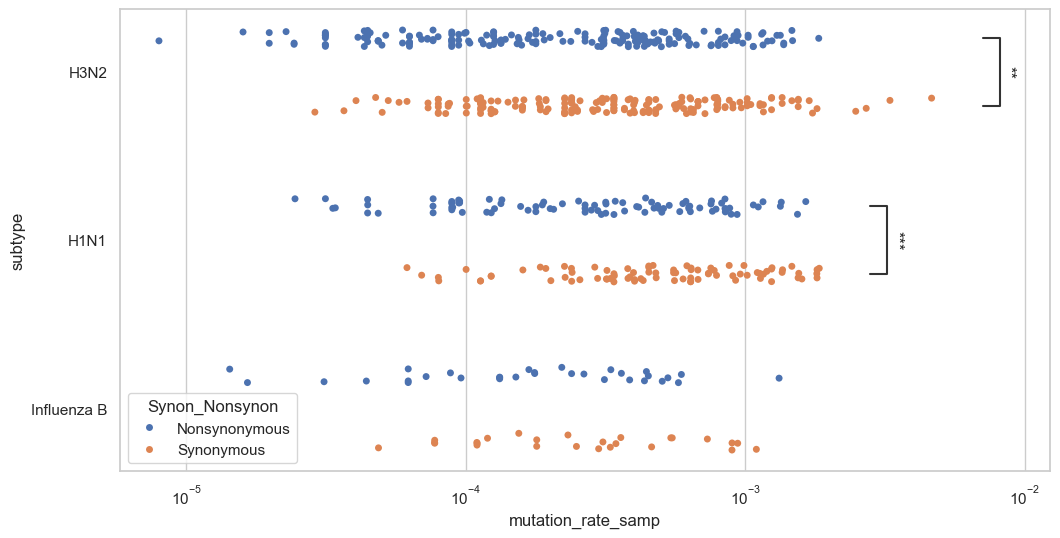

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
fig_args_horiz = {
    **fig_args,
    'y': 'subtype',
    'x': 'mutation_rate_samp'
}
ax.set_xscale('log')
sns.stripplot(ax=ax, orient='h', **fig_args_horiz)
annotator.new_plot(ax, plot='swarmplot', orient='h', **fig_args_horiz)
annotator.configure(
    hide_non_significant=True,
    pvalue_thresholds=[[1e-4, "****"], [1e-3, "***"], [1e-2, "**"], [0.05, "*"]],  # removing ns as won't be shown
)
annotator.apply_and_annotate()

Back to vertical, with a different format for pvalues

variables={'x': 'subtype', 'y': 'mutation_rate_samp', 'hue': 'Synon_Nonsynon'}
self.tuple_group_names=[('H3N2', 'Nonsynonymous'), ('H3N2', 'Synonymous'), ('H1N1', 'Nonsynonymous'), ('H1N1', 'Synonymous'), ('Influenza B', 'Nonsynonymous'), ('Influenza B', 'Synonymous')]
self.plotter.group_names=Index(['H3N2', 'H1N1', 'Influenza B'], dtype='object', name='x')
self.plotter.hue_names=['Nonsynonymous', 'Synonymous']
H1N1_Nonsynonymous vs. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous vs. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous vs. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


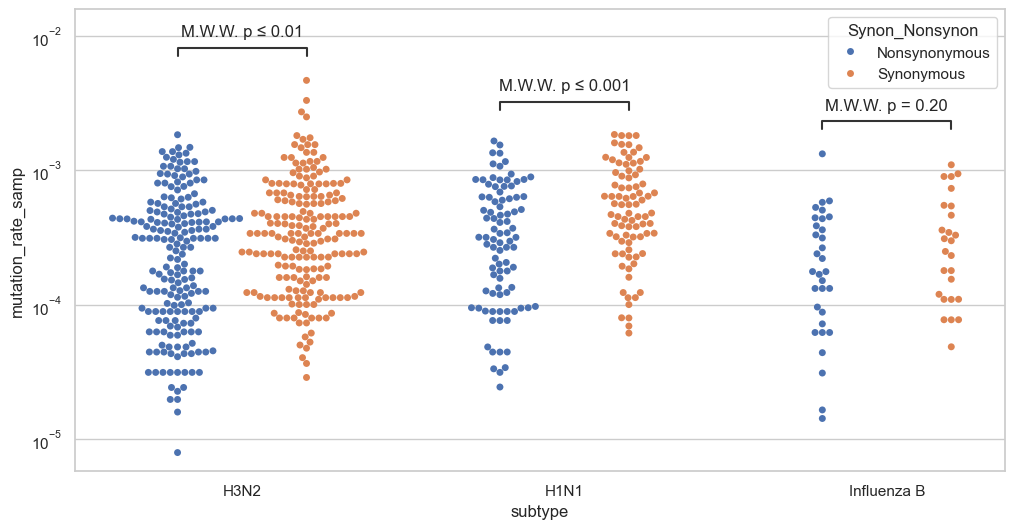

In [22]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_yscale('log')

sns.swarmplot(ax=ax, **fig_args)
annotator.new_plot(ax, plot='swarmplot', **fig_args)
annotator.reset_configuration()  # undo hide_non_signif and pvalues
annotator.configure(**{**configuration, "text_format":"simple", "text_offset":6})\
    .apply_test().annotate()
fig.savefig(f'flu_dataset_log_scale_in_axes.svg', format='svg')


As a violin plot

variables={'x': 'subtype', 'y': 'mutation_rate_samp', 'hue': 'Synon_Nonsynon'}
self.tuple_group_names=[('H3N2', 'Nonsynonymous'), ('H3N2', 'Synonymous'), ('H1N1', 'Nonsynonymous'), ('H1N1', 'Synonymous'), ('Influenza B', 'Nonsynonymous'), ('Influenza B', 'Synonymous')]
self.plotter.group_names=Index(['H3N2', 'H1N1', 'Influenza B'], dtype='object', name='x')
self.plotter.hue_names=['Nonsynonymous', 'Synonymous']
H1N1_Nonsynonymous vs. H1N1_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:5.014e-04 U_stat=2.624e+03
H3N2_Nonsynonymous vs. H3N2_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:1.294e-03 U_stat=1.535e+04
Influenza B_Nonsynonymous vs. Influenza B_Synonymous: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-01 U_stat=3.340e+02


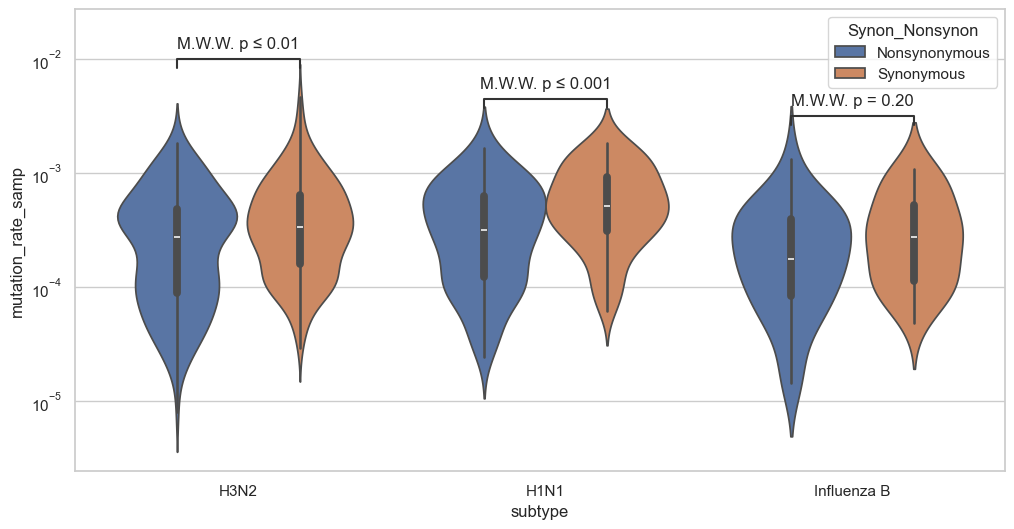

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.set_yscale('log')

sns.violinplot(ax=ax, **fig_args)
# plt.legend(loc="lower right")
annotator.new_plot(ax, plot='violinplot', **fig_args)
annotator.apply_test().annotate()  # No need to `configure` to use the same parameters
y_lims = ax.get_ylim()
ax.set_ylim(y_lims[0], 1.25 * y_lims[1])
fig.savefig(f'flu_dataset_log_scale_in_axes_violin.png', format='png')